In [16]:
import pandas as pd

df = pd.read_csv('./data/cctv_seoul.csv')
print(df)

      구별  CCTV수       인구수       한국인      외국인      고령자
0    강남구   2780  570500.0  565550.0   4950.0  63167.0
1    강동구    773  453233.0  449019.0   4214.0  54622.0
2    강북구    748  330192.0  326686.0   3506.0  54813.0
3    강서구    884  603772.0  597248.0   6524.0  72548.0
4    관악구   1496  525515.0  507203.0  18312.0  68082.0
5    광진구    707  372164.0  357211.0  14953.0  42214.0
6    구로구   1561  447874.0  416487.0  31387.0  56833.0
7    금천구   1015  255082.0  236353.0  18729.0  32970.0
8    노원구   1265  569384.0  565565.0   3819.0  71941.0
9    도봉구    485  348646.0  346629.0   2017.0  51312.0
10  동대문구   1294  369496.0  354079.0  15417.0  54173.0
11   동작구   1091  412520.0  400456.0  12064.0  56013.0
12   마포구    574  389649.0  378566.0  11083.0  48765.0
13  서대문구    962  327163.0  314982.0  12181.0  48161.0
14   서초구   1930  450310.0  445994.0   4316.0  51733.0
15   성동구   1062  311244.0  303380.0   7864.0  39997.0
16   성북구   1464  461260.0  449773.0  11487.0  64692.0
17   송파구    618  667483.0  6

In [5]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc  
if sys.platform  == 'darwin':                             ## MAC OS의 이름을 확인한다.
    path = '.....'  
elif sys.platform == 'win32':                             ## Windows 이름을 확인한다.
    path = "font/MaplestoryBold.ttf"
else:
    print('Unknown system... sorry~~~~') 
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.family'] = 'NanumGothic'

In [35]:
from matplotlib import cm

df.set_index('구별',inplace=True)
print(df)

      CCTV수       인구수       한국인      외국인      고령자
구별                                               
강남구    2780  570500.0  565550.0   4950.0  63167.0
강동구     773  453233.0  449019.0   4214.0  54622.0
강북구     748  330192.0  326686.0   3506.0  54813.0
강서구     884  603772.0  597248.0   6524.0  72548.0
관악구    1496  525515.0  507203.0  18312.0  68082.0
광진구     707  372164.0  357211.0  14953.0  42214.0
구로구    1561  447874.0  416487.0  31387.0  56833.0
금천구    1015  255082.0  236353.0  18729.0  32970.0
노원구    1265  569384.0  565565.0   3819.0  71941.0
도봉구     485  348646.0  346629.0   2017.0  51312.0
동대문구   1294  369496.0  354079.0  15417.0  54173.0
동작구    1091  412520.0  400456.0  12064.0  56013.0
마포구     574  389649.0  378566.0  11083.0  48765.0
서대문구    962  327163.0  314982.0  12181.0  48161.0
서초구    1930  450310.0  445994.0   4316.0  51733.0
성동구    1062  311244.0  303380.0   7864.0  39997.0
성북구    1464  461260.0  449773.0  11487.0  64692.0
송파구     618  667483.0  660584.0   6899.0  72506.0


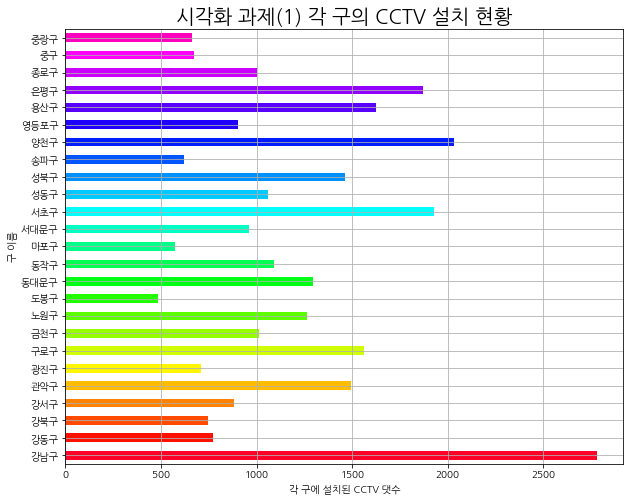

In [41]:
mycolormap = cm.get_cmap("gist_rainbow", 25)
mycolor = [mycolormap(i) for i in range(25)]

df['CCTV수'].plot(kind='barh', figsize=(10, 8), color=mycolor, grid=True)
plt.ylabel('구 이름')
plt.xlabel('각 구에 설치된 CCTV 댓수')
plt.title('시각화 과제(1) 각 구의 CCTV 설치 현황', size=20)
plt.savefig("output/hw5.png")

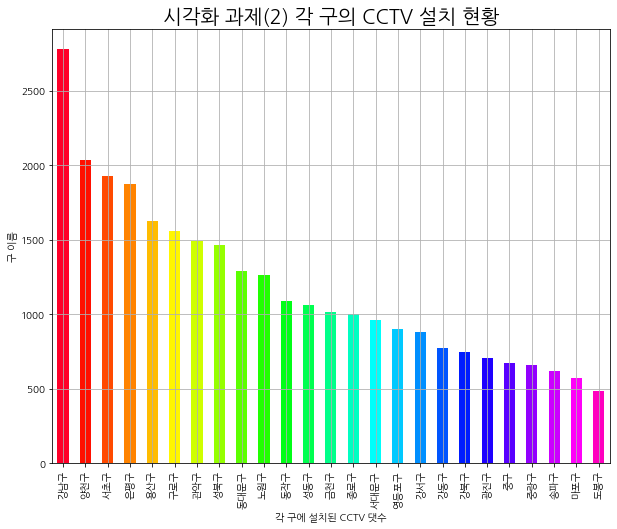

In [44]:
df1 = df.sort_values(by="CCTV수", ascending=False)

df1['CCTV수'].plot(kind='bar', figsize=(10, 8), color=mycolor, grid=True)
plt.ylabel('구 이름')
plt.xlabel('각 구에 설치된 CCTV 댓수')
plt.title('시각화 과제(2) 각 구의 CCTV 설치 현황', size=20)
plt.savefig("output/hw6.png")

In [47]:
df2 = df
df2['CCTV비율'] = df2['CCTV수']/df2['인구수']*100
df2['노인비율'] = df2['고령자']/df2['인구수']*100
print(df2.head())

     CCTV수       인구수       한국인      외국인      고령자    CCTV비율       노인비율
구별                                                                   
강남구   2780  570500.0  565550.0   4950.0  63167.0  0.487292  11.072217
강동구    773  453233.0  449019.0   4214.0  54622.0  0.170552  12.051638
강북구    748  330192.0  326686.0   3506.0  54813.0  0.226535  16.600342
강서구    884  603772.0  597248.0   6524.0  72548.0  0.146413  12.015794
관악구   1496  525515.0  507203.0  18312.0  68082.0  0.284673  12.955291


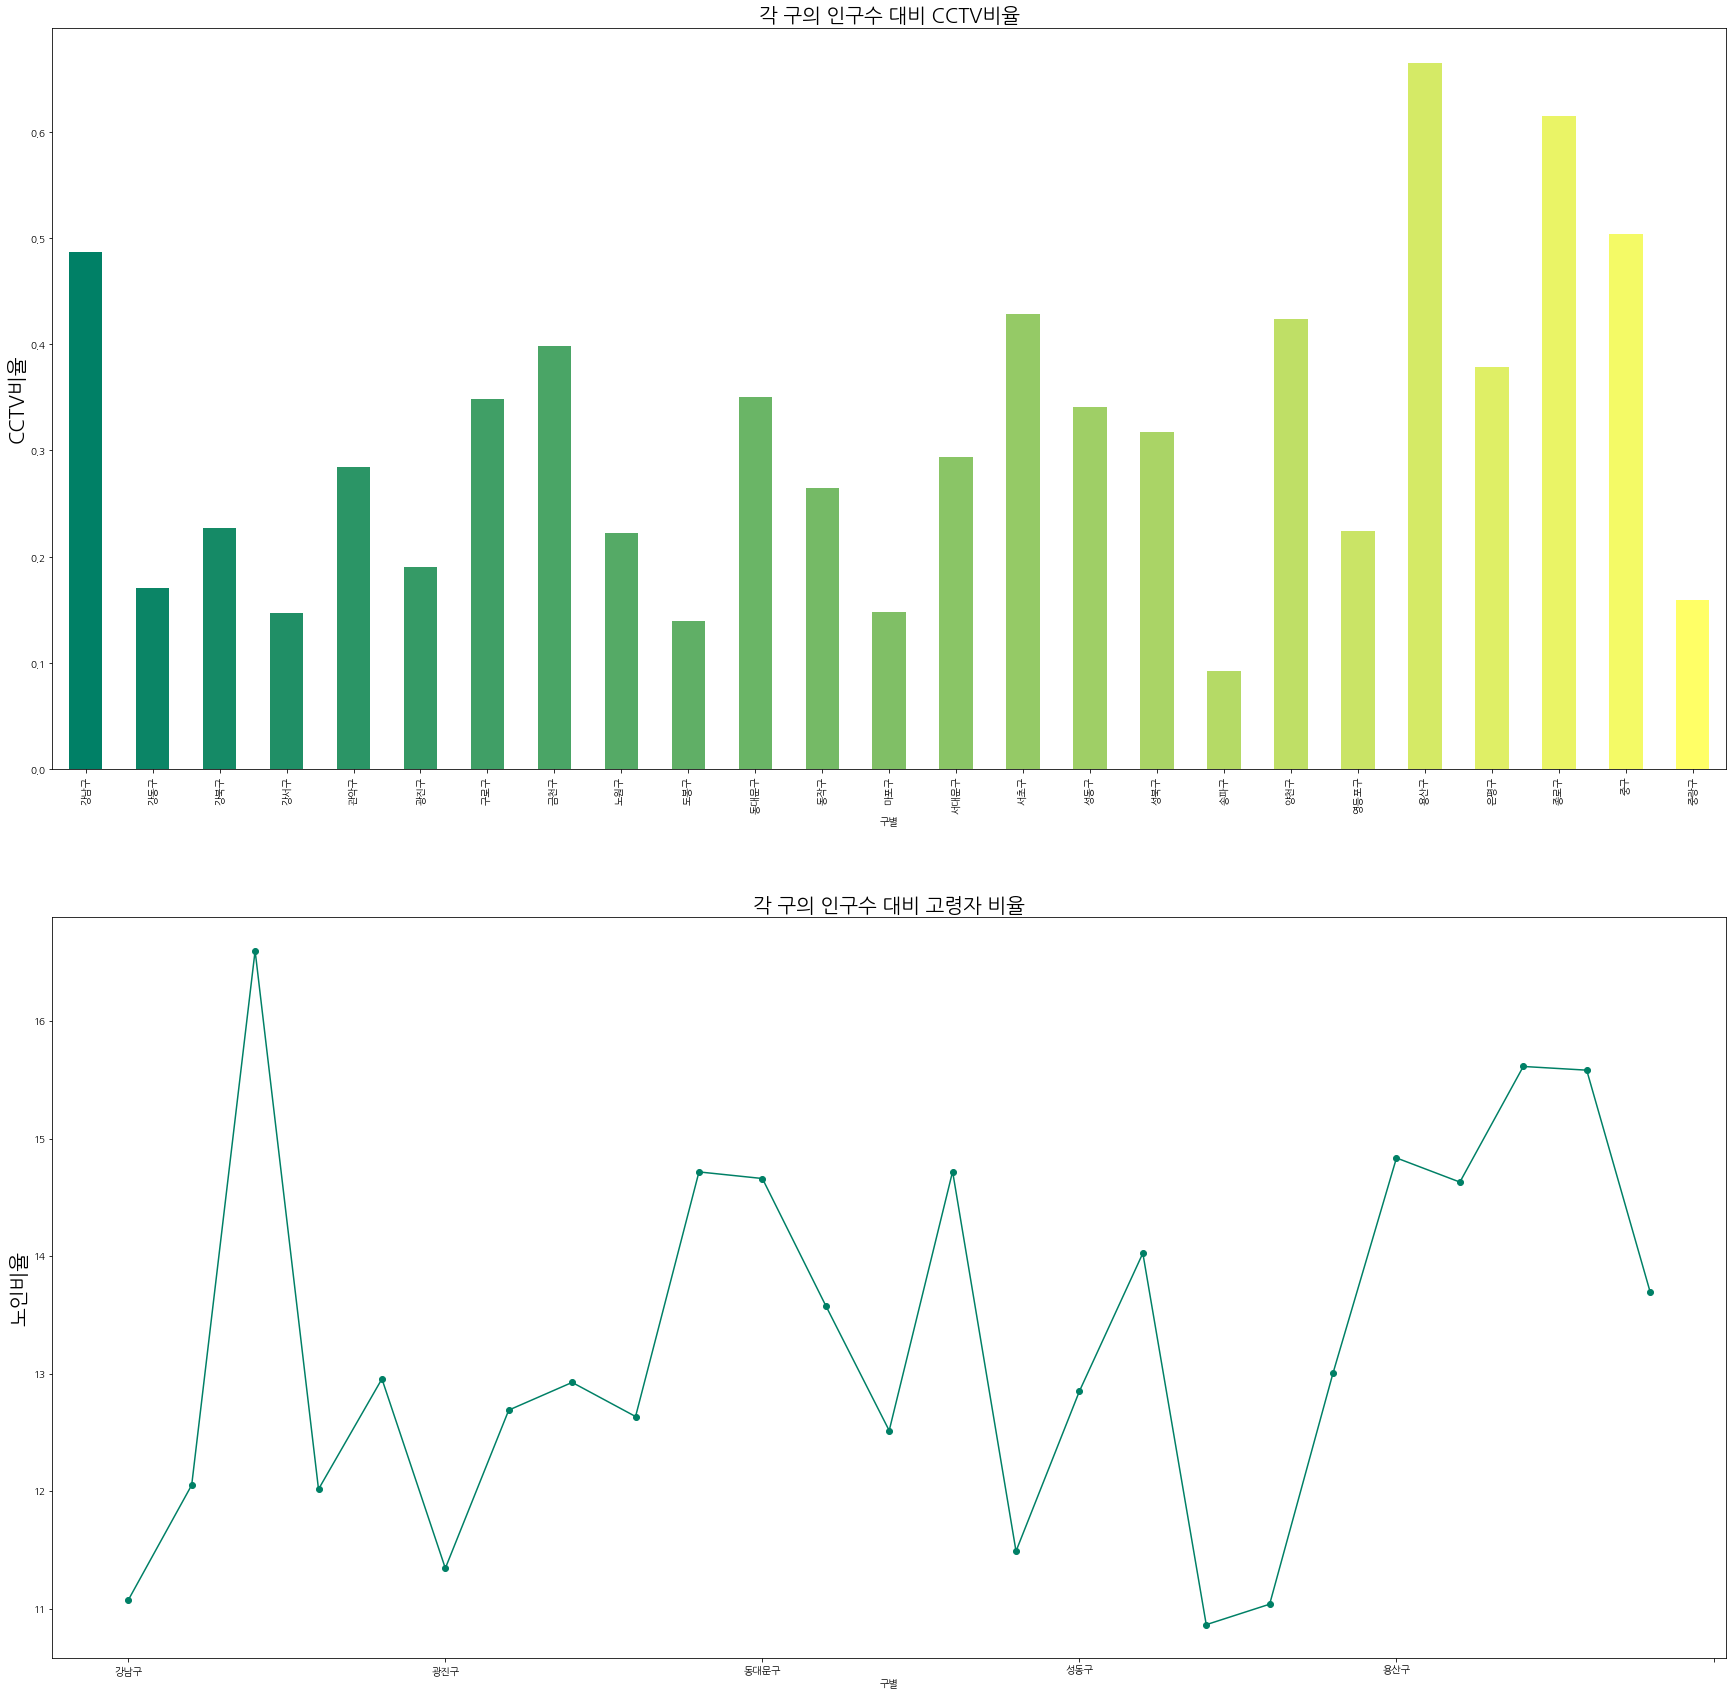

In [86]:
mycolormap = cm.get_cmap("summer", 25)
mycolor = [mycolormap(i) for i in range(25)]

plt.figure(figsize=(30, 30))
plt.subplot(2,1,1)
df2['CCTV비율'].plot(kind = 'bar',color=mycolor)
plt.ylabel('CCTV비율',size=20)
plt.title('각 구의 인구수 대비 CCTV비율', size=20)
plt.subplot(2,1,2)
df2['노인비율'].plot(kind = 'line', marker='o',color=mycolor)
plt.ylabel('노인비율',size=20)
plt.title('각 구의 인구수 대비 고령자 비율', size=20)
plt.savefig("output/hw7.png")